In [844]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [845]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [846]:
df = pd.read_csv('/content/drive/MyDrive/ML learning/AdultIncome - Sheet1.csv')

In [847]:
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [848]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None


In [849]:
df = df.replace(' ?', np.nan)
df = df.replace('?', np.nan)


In [850]:
print(df.isna())

         age  workclass  fnlwgt  education  education.num  marital.status  \
0      False       True   False      False          False           False   
1      False      False   False      False          False           False   
2      False       True   False      False          False           False   
3      False      False   False      False          False           False   
4      False      False   False      False          False           False   
...      ...        ...     ...        ...            ...             ...   
32556  False      False   False      False          False           False   
32557  False      False   False      False          False           False   
32558  False      False   False      False          False           False   
32559  False      False   False      False          False           False   
32560  False      False   False      False          False           False   

       occupation  relationship   race    sex  capital.gain  capital.loss  

In [851]:
print("Missing values per column after replacing '?':")
print(df.isna().sum())

Missing values per column after replacing '?':
age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64


In [852]:
print("Duplicate rows:",df.duplicated().sum())

Duplicate rows: 24


In [853]:
print("Duplicate rows after cleaning:", df.duplicated().sum())


Duplicate rows after cleaning: 24


In [854]:
print(df.describe())

                age        fnlwgt  education.num  capital.gain  capital.loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours.per.week  
count    32561.000000  
mean        40.437456  
std         12.347429  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000  


In [855]:
print(df.describe(include=[object]))



       workclass education      marital.status      occupation relationship  \
count      30725     32561               32561           30718        32561   
unique         8        16                   7              14            6   
top      Private   HS-grad  Married-civ-spouse  Prof-specialty      Husband   
freq       22696     10501               14976            4140        13193   

         race    sex native.country income  
count   32561  32561          31978  32561  
unique      5      2             41      2  
top     White   Male  United-States  <=50K  
freq    27816  21790          29170  24720  


In [856]:
print("Unique values in each column:")
for col in df.columns:
    print(col, ":", df[col].nunique())

Unique values in each column:
age : 73
workclass : 8
fnlwgt : 21648
education : 16
education.num : 16
marital.status : 7
occupation : 14
relationship : 6
race : 5
sex : 2
capital.gain : 119
capital.loss : 92
hours.per.week : 94
native.country : 41
income : 2


In [857]:
for col in df.columns:
    print("Value counts for ")
    print(df[col].value_counts())
    print("--------------------------------------------------")


Value counts for 
age
36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: count, Length: 73, dtype: int64
--------------------------------------------------
Value counts for 
workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64
--------------------------------------------------
Value counts for 
fnlwgt
164190    13
203488    13
123011    13
148995    12
121124    12
          ..
136204     1
172274     1
70037      1
422013     1
216864     1
Name: count, Length: 21648, dtype: int64
--------------------------------------------------
Value counts for 
education
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7t

In [858]:
if 'age' in df.columns:
    print("Rows with unrealistic age (>70):")
    print(df[df['age'] > 70].shape[0])
    df = df[df['age'] <= 70]


Rows with unrealistic age (>70):
540


In [859]:
if 'hours.per.week' in df.columns:
    print("Rows with hours.per.week >70:")
    print(df[df['hours.per.week'] > 70].shape[0])
    df = df[df['hours.per.week'] <= 70]

Rows with hours.per.week >70:
490


In [860]:
print(df.shape)

(31531, 15)


In [861]:
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
   df[col] = df[col].astype(str).str.strip()

In [862]:
df = df.dropna(subset=['native.country'])


In [863]:
if 'workclass' in df.columns:
    df['workclass'] = df['workclass'].fillna(df['workclass'].mode()[0])
if 'occupation' in df.columns:
    df['occupation'] = df['occupation'].fillna(df['occupation'].mode()[0])

In [864]:
print(df.isna().sum())


age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64


In [865]:
num_cols = df.select_dtypes(include="number").columns
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = ((df[col] < lower) | (df[col] > upper)).sum()
    print(col ,":", outliers ,"outliers")


age : 0 outliers
fnlwgt : 956 outliers
education.num : 1092 outliers
capital.gain : 2580 outliers
capital.loss : 1466 outliers
hours.per.week : 8156 outliers


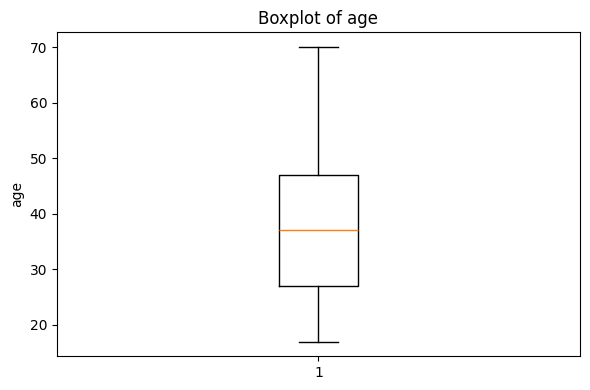

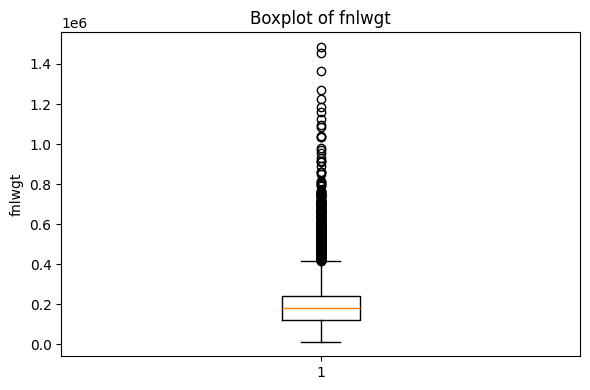

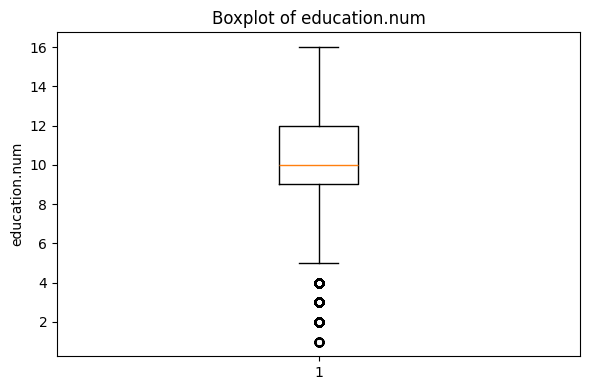

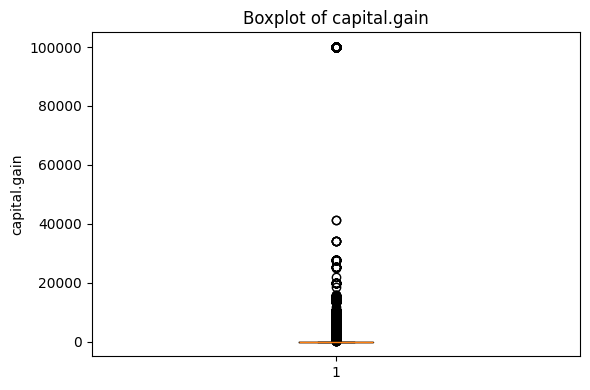

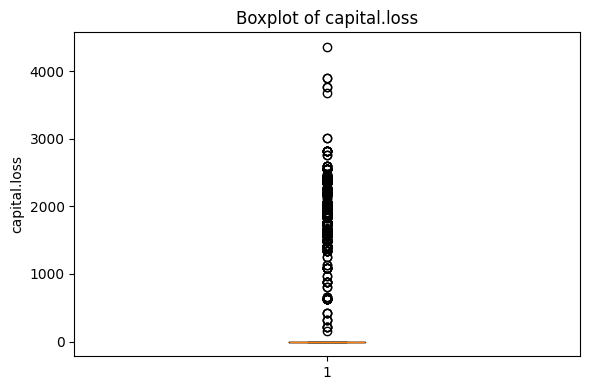

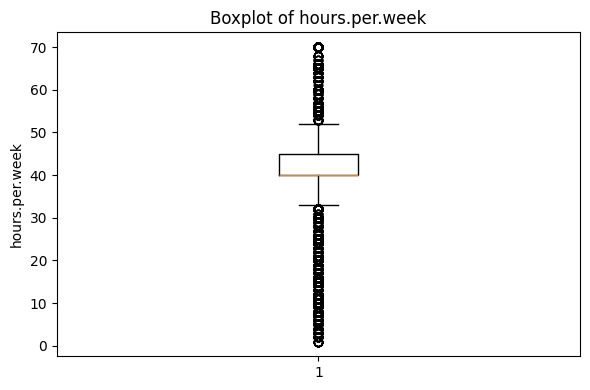

In [866]:
for col in ['age','fnlwgt','education.num','capital.gain','capital.loss','hours.per.week']:
    plt.figure(figsize=(6, 4))
    plt.boxplot(df[col])
    plt.title('Boxplot of ' + col)
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

In [867]:
key_cols =  ['age','fnlwgt','education.num','capital.gain','capital.loss','hours.per.week']
for col in key_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    before = len(df)
    df = df[(df[col] >= lower) & (df[col] <= upper)]
    removed = before - len(df)
    print(f"{col}: Removed {removed} outliers")

age: Removed 0 outliers
fnlwgt: Removed 956 outliers
education.num: Removed 1034 outliers
capital.gain: Removed 2460 outliers
capital.loss: Removed 1401 outliers
hours.per.week: Removed 6748 outliers


In [868]:
num_cols = df.select_dtypes(include="number").columns
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = ((df[col] < lower) | (df[col] > upper)).sum()
    print(col ,":", outliers ,"outliers")


age : 0 outliers
fnlwgt : 199 outliers
education.num : 0 outliers
capital.gain : 0 outliers
capital.loss : 0 outliers
hours.per.week : 6552 outliers


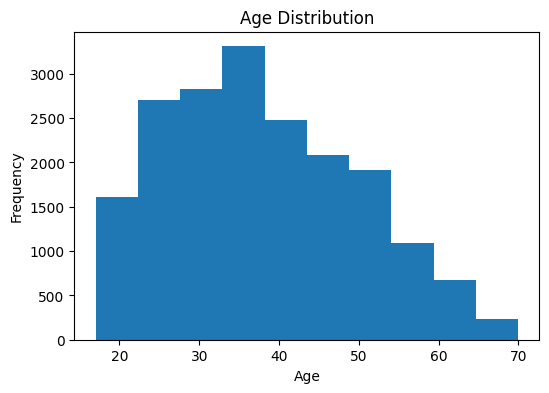

In [869]:
plt.figure(figsize=(6,4))
plt.hist(df['age'])
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

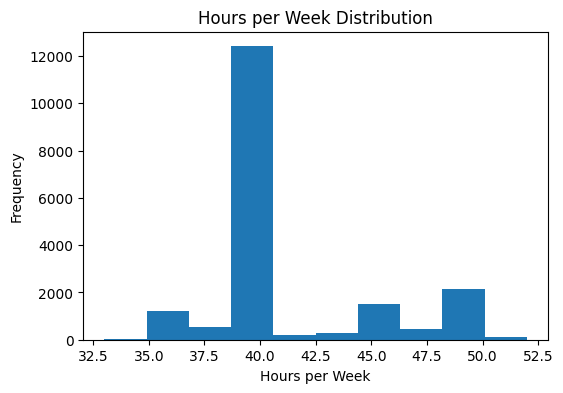

In [870]:
plt.figure(figsize=(6,4))
plt.hist(df['hours.per.week'])
plt.title("Hours per Week Distribution")
plt.xlabel("Hours per Week")
plt.ylabel("Frequency")
plt.show()

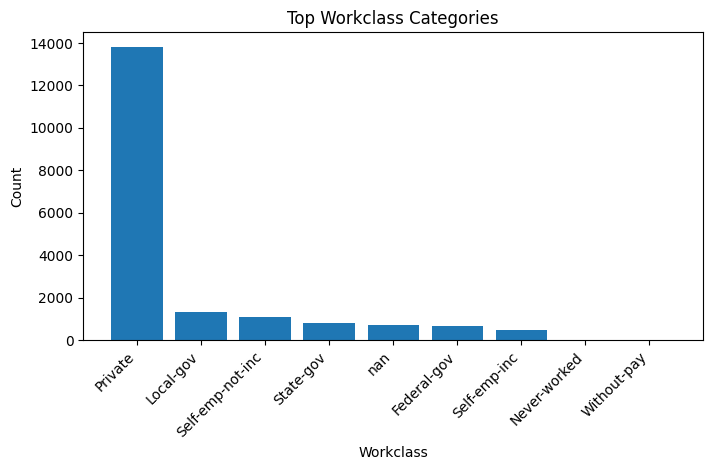

In [871]:
plt.figure(figsize=(8,4))
plt.bar(df['workclass'].value_counts().head(20).index, df['workclass'].value_counts().head(20).values)
plt.xticks(rotation=45, ha='right')
plt.title("Top Workclass Categories")
plt.xlabel("Workclass")
plt.ylabel("Count")
plt.show()


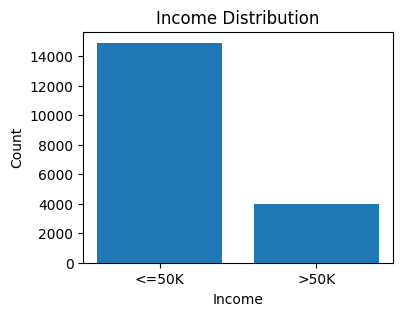

In [872]:
plt.figure(figsize=(4,3))
plt.bar(df['income'].value_counts().index, df['income'].value_counts().values)
plt.title("Income Distribution")
plt.xlabel("Income")
plt.ylabel("Count")
plt.show()


In [873]:
print("Correlation matrix:")
print(df.corr(numeric_only=True))

Correlation matrix:
                     age    fnlwgt  education.num  capital.gain  capital.loss  \
age             1.000000 -0.070117       0.054053           NaN           NaN   
fnlwgt         -0.070117  1.000000      -0.024705           NaN           NaN   
education.num   0.054053 -0.024705       1.000000           NaN           NaN   
capital.gain         NaN       NaN            NaN           NaN           NaN   
capital.loss         NaN       NaN            NaN           NaN           NaN   
hours.per.week  0.055492 -0.016989       0.131994           NaN           NaN   

                hours.per.week  
age                   0.055492  
fnlwgt               -0.016989  
education.num         0.131994  
capital.gain               NaN  
capital.loss               NaN  
hours.per.week        1.000000  


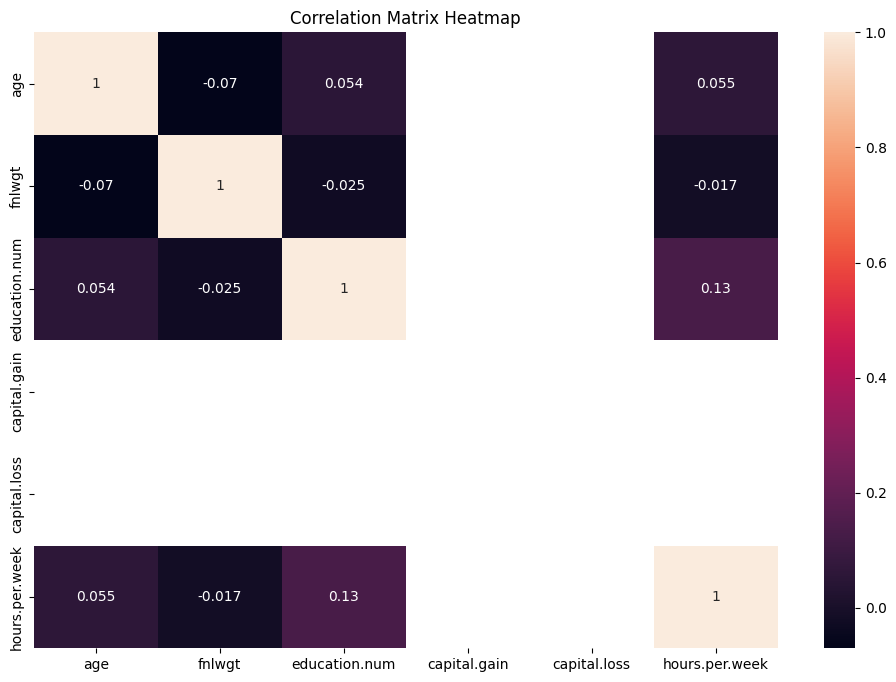

In [874]:

corr_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True)
plt.title("Correlation Matrix Heatmap")
plt.show()

####Encoding


In [875]:
from sklearn.preprocessing import LabelEncoder


In [876]:
le = LabelEncoder()


In [877]:
cat_cols = ['workclass', 'education', 'marital.status', 'occupation','relationship', 'race', 'sex', 'native.country']
for col in cat_cols:
    df[col] = le.fit_transform(df[col])


In [878]:
print(df)

       age  workclass  fnlwgt  education  education.num  marital.status  \
4232    38          3  215646          8              9               0   
4233    53          3  234721          1              7               2   
4234    28          3  338409          6             13               2   
4235    37          3  284582          9             14               2   
4237    52          5  209642          8              9               2   
...    ...        ...     ...        ...            ...             ...   
32555   53          3  321865          9             14               2   
32556   22          3  310152         11             10               4   
32557   27          3  257302          4             12               2   
32558   40          3  154374          8              9               2   
32559   58          3  151910          8              9               6   

       occupation  relationship  race  sex  capital.gain  capital.loss  \
4232            5        

In [879]:
df['income'] = df['income'].str.strip()
df['income'] = le.fit_transform(df['income'])


In [880]:
corr = df.corr(numeric_only=True)
print("Correlation matrix:")
print(corr)

Correlation matrix:
                     age  workclass    fnlwgt  education  education.num  \
age             1.000000  -0.013409 -0.070117  -0.015277       0.054053   
workclass      -0.013409   1.000000 -0.011258  -0.012712      -0.052111   
fnlwgt         -0.070117  -0.011258  1.000000  -0.008887      -0.024705   
education      -0.015277  -0.012712 -0.008887   1.000000       0.179427   
education.num   0.054053  -0.052111 -0.024705   0.179427       1.000000   
marital.status -0.303204   0.035978  0.035575  -0.014059      -0.012912   
occupation     -0.012453   0.255211  0.001579  -0.047048       0.081405   
relationship   -0.220799   0.016789  0.005283   0.013637      -0.082492   
race            0.020518   0.019682 -0.006062   0.014720       0.029511   
sex             0.058193   0.008678  0.018326  -0.032367      -0.007908   
capital.gain         NaN        NaN       NaN        NaN            NaN   
capital.loss         NaN        NaN       NaN        NaN            NaN   
hours

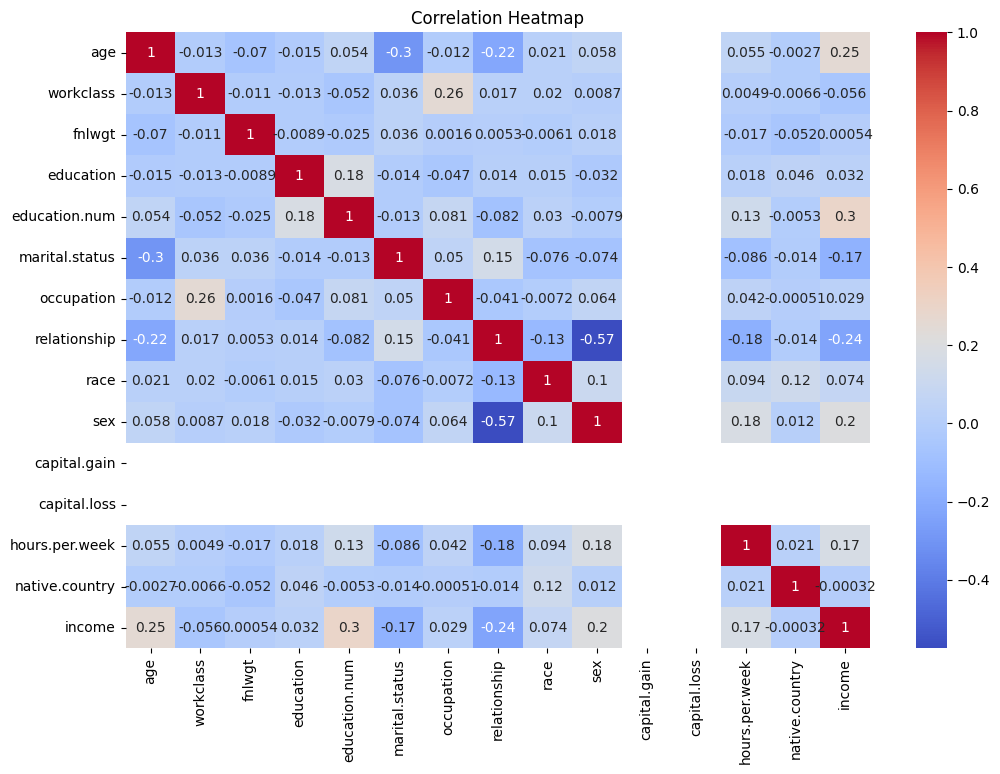

In [881]:
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [882]:
target_corr = corr['income'].sort_values(ascending=False)
print("Correlation of each column with target (income):")
print(target_corr)

Correlation of each column with target (income):
income            1.000000
education.num     0.295955
age               0.250008
sex               0.202840
hours.per.week    0.172930
race              0.073888
education         0.031734
occupation        0.029264
fnlwgt            0.000545
native.country   -0.000316
workclass        -0.056294
marital.status   -0.165917
relationship     -0.235295
capital.gain           NaN
capital.loss           NaN
Name: income, dtype: float64


In [883]:
drop_cols = ['fnlwgt', 'native.country', 'education']

df = df.drop(columns=drop_cols)


In [884]:
if (df['capital.gain'] == 0).mean() > 0.95:
    df = df.drop(columns=['capital.gain'])
    print("Dropped capital.gain (mostly zeros).")

if (df['capital.loss'] == 0).mean() > 0.95:
    df = df.drop(columns=['capital.loss'])
    print("Dropped capital.loss (mostly zeros).")


Dropped capital.gain (mostly zeros).
Dropped capital.loss (mostly zeros).


####Training

In [885]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [886]:
x = df.loc[:, df.columns != 'income']
y = df['income']


In [887]:
print("Feature matrix shape:", x.shape)
print("Target matrix shape:", y.shape)
print("Target class distribution:")
print(y.value_counts())

Feature matrix shape: (18932, 9)
Target matrix shape: (18932,)
Target class distribution:
income
0    14927
1     4005
Name: count, dtype: int64


In [888]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.3,random_state=42,stratify=y)

In [889]:
print(x_train.shape)


(13252, 9)


In [890]:
print(x_test.shape)

(5680, 9)


In [891]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [892]:
from sklearn.metrics import accuracy_score, confusion_matrix

y_pred = model.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_pred))



Accuracy: 0.8202464788732394


In [893]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[4255  223]
 [ 798  404]]


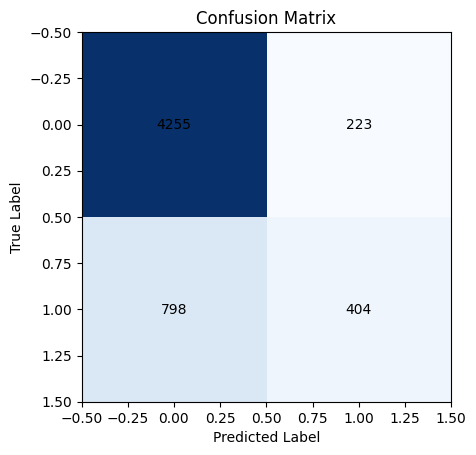

In [894]:
plt.imshow(cm, cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
for i in range(len(cm)):
    for j in range(len(cm[0])):
        plt.text(j, i, cm[i][j], ha='center', va='center', color='black')

plt.show()

In [895]:
from sklearn.metrics import precision_score, recall_score, f1_score

print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-Score:", f1_score(y_test, y_pred))


Precision: 0.6443381180223285
Recall: 0.33610648918469216
F1-Score: 0.4417714598141061
